In [5]:
import numpy as np
from abc import ABC, abstractmethod

import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib notebook

In [154]:
class objective_func(ABC):
    @abstractmethod
    def func(self, x):
        pass
    @abstractmethod
    def dfunc(self, x):
        pass
    @abstractmethod
    def get_optimal(self):
        pass
    @abstractmethod
    def get_optimum(self):
        pass
    def visualise2d(self, lim, n):
        x, y = np.linspace(-lim, lim, N), np.linspace(-lim, lim, N)
        xx, yy = np.meshgrid(x, y)
        zz = self.func((xx, yy))
        fig = plt.figure(figsize=(4,4))
        ax = fig.add_subplot(111)
        ax.scatter(x=xx.ravel(), y=yy.ravel(), c=zz.ravel())
        ax.scatter(x=[self.optimal[0]], y=[self.optimal[1]], c='red', marker='x')
        fig.show()
        return ax
    def visualise3d(self, lim, n):
        x, y = np.linspace(-lim, lim, n), np.linspace(-lim, lim, n)
        z = []
        for i in y:
            z_line = []
            for j in x:
                z_line.append(self.func([j,i]))
            z.append(z_line)
        fig = go.Figure(data=[go.Surface(z=z, x=x, y=y),  \
                              go.Scatter3d(x=[self.optimal[0]], y=[self.optimal[1]], z=[self.optimum])])
        fig.update_layout(autosize=False,
                          scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                          width=500, height=500,
                          margin=dict(l=65, r=50, b=65, t=90))
        fig.show()
    def visulise_gradient(self, lim, n):
        x, y = np.linspace(-lim, lim, n), np.linspace(-lim, lim, n)
        xx, yy = np.meshgrid(x, y)
        zz = np.zeros((n, n, 2))
        for j in range(len(y)):
            for i in range(len(x)):
                zz[j, i, :] = self.dfunc([x[i], y[j]])
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111)
        ax.quiver(xx,yy,zz[:,:,0],zz[:,:,1])
        ax.scatter(x=[self.optimal[0]], y=[self.optimal[1]], c='red', marker='x')
        fig.show()
        return ax

In [150]:
class ackley(objective_func):
    def __init__(self):
        self.optimal = np.array([0, 0])
        self.optimum = 0
    def func(self, x):
        '''
        the period of local minimum along each axis is 1, integer coordinate (1,1), (2,3)... 
        x and y is interchangeable
        global minimum is 0 with arguments x=y=0
        local minimums far away from orgin are 20
        supremum is 20 + e - 1/e = 22.35
        symmetric along x=0, y=0, y=x lines
        disappearing global gradient when far away from optimal
        '''
        return -20. * np.exp(self.arg1(x)) - np.exp(self.arg2(x)) + 20. + np.e
    def dfunc(self, x):
        if x[0] == 0 and x[1] == 0: 
            return x
        return np.array([-0.4 * x[0] / self.arg1(x) * np.exp(self.arg1(x)) + np.pi * np.sin(2 * np.pi * x[0]) * np.exp(self.arg2(x)), 
                -0.4 * x[1] / self.arg1(x) * np.exp(self.arg1(x)) + np.pi * np.sin(2 * np.pi * x[1]) * np.exp(self.arg2(x))])
    def arg1(self, x):
        return -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    def arg2(self, x):
        return 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    def get_optimal(self):
        return self.optimal
    def get_optimum(self):
        return self.optimum
a = ackley()
print("check func value at optimal is", a.get_optimum(), "(optimum): ", a.func(a.get_optimal()))
print("check gradient is (0,0): ",a.dfunc(a.get_optimal()))

check func value at optimal is 0 (optimum):  4.440892098500626e-16
check gradient is (0,0):  [0 0]


<IPython.core.display.Javascript object>


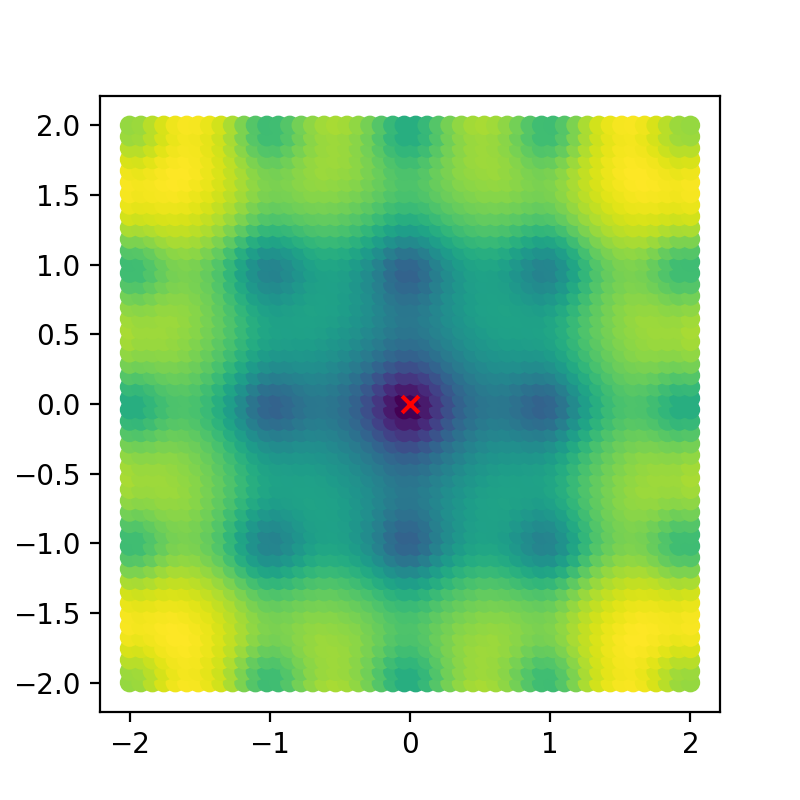

In [146]:
a.visualise2d(lim=2, n=50)

In [127]:
a.visualise3d(lim=2, n=50)

<IPython.core.display.Javascript object>


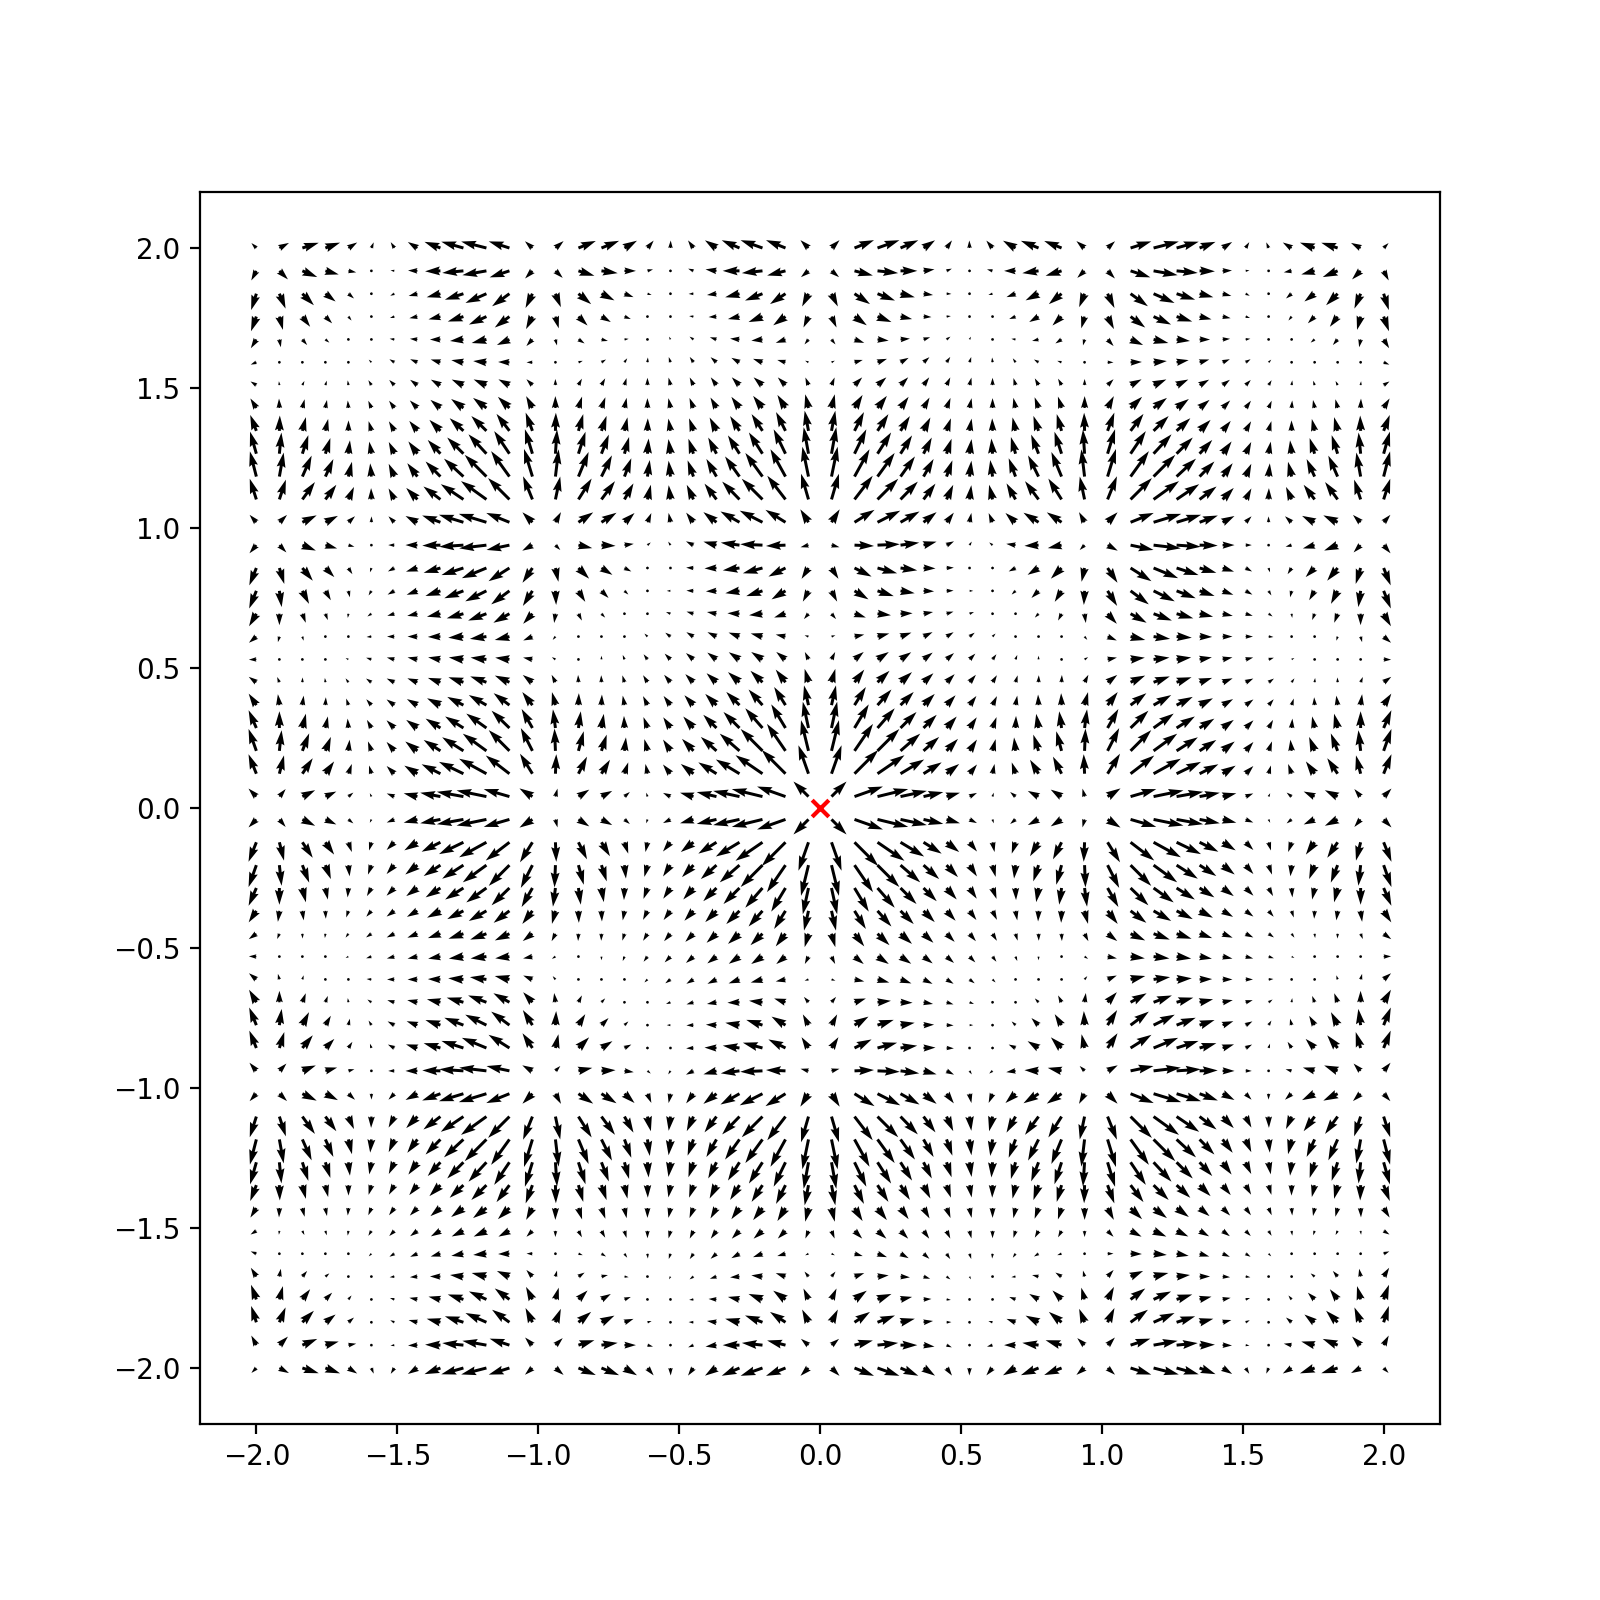

In [132]:
a.visulise_gradient(lim=2, n=50)

In [155]:
class bukin(objective_func):
    '''
    non-disappearing gradient
    large gradient and uncontinuous gradient around ridge/local optimal
    optimum: 0
    optimal: (-10, 1)
    '''
    def __init__(self):
        self.optimal = np.array([-10, 1])
        self.optimum = 0
    def func(self, x):
        return 100 * np.sqrt(np.abs(x[1] - 0.01 * x[0]**2)) + 0.01 * np.abs(x[0] + 10)
    def dfunc(self, x):
        arg1 = x[1] - 0.01 * x[0]**2
        arg2 = 1 / np.sqrt(np.abs(arg1)) if arg1 != 0 else 0
        return np.array([- np.sign(arg1) * x[1] * arg2 + 0.01 * np.sign(x[0] + 10), 50 * np.sign(arg1) * arg2])
    def get_optimal(self):
        return self.optimal
    def get_optimum(self):
        return self.optimum
b = bukin()
print("check func value at optimal is", b.get_optimum(), "(optimum): ", b.func(b.get_optimal()))
print("check gradient is (0,0): ",b.dfunc(b.get_optimal()))

check func value at optimal is 0 (optimum):  0.0
check gradient is (0,0):  [0. 0.]


<IPython.core.display.Javascript object>


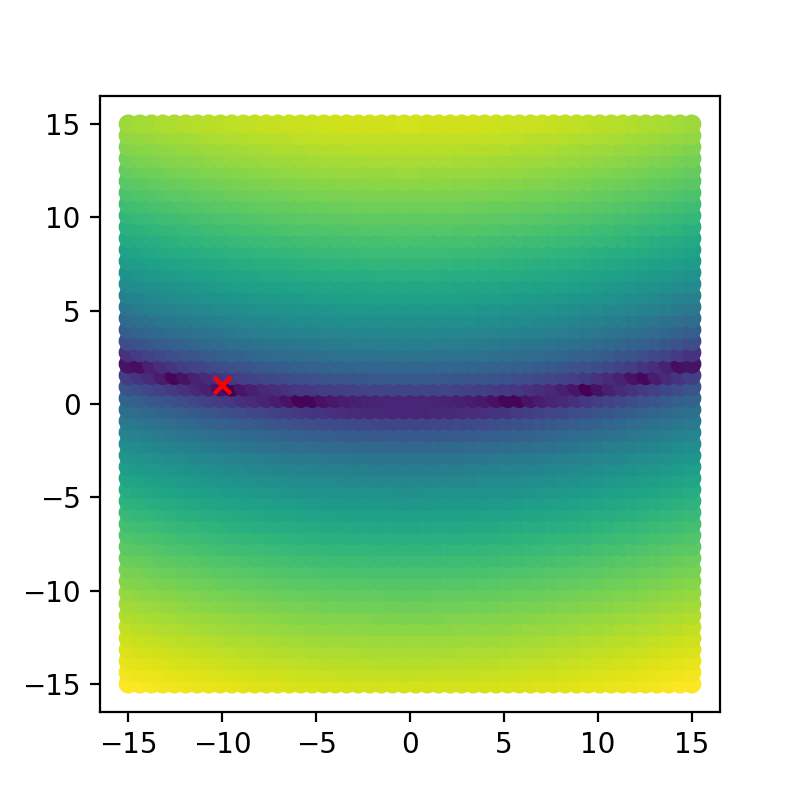

In [148]:
b.visualise2d(lim=15, n=50)

In [156]:
b.visualise3d(lim=15, n=30)

<IPython.core.display.Javascript object>


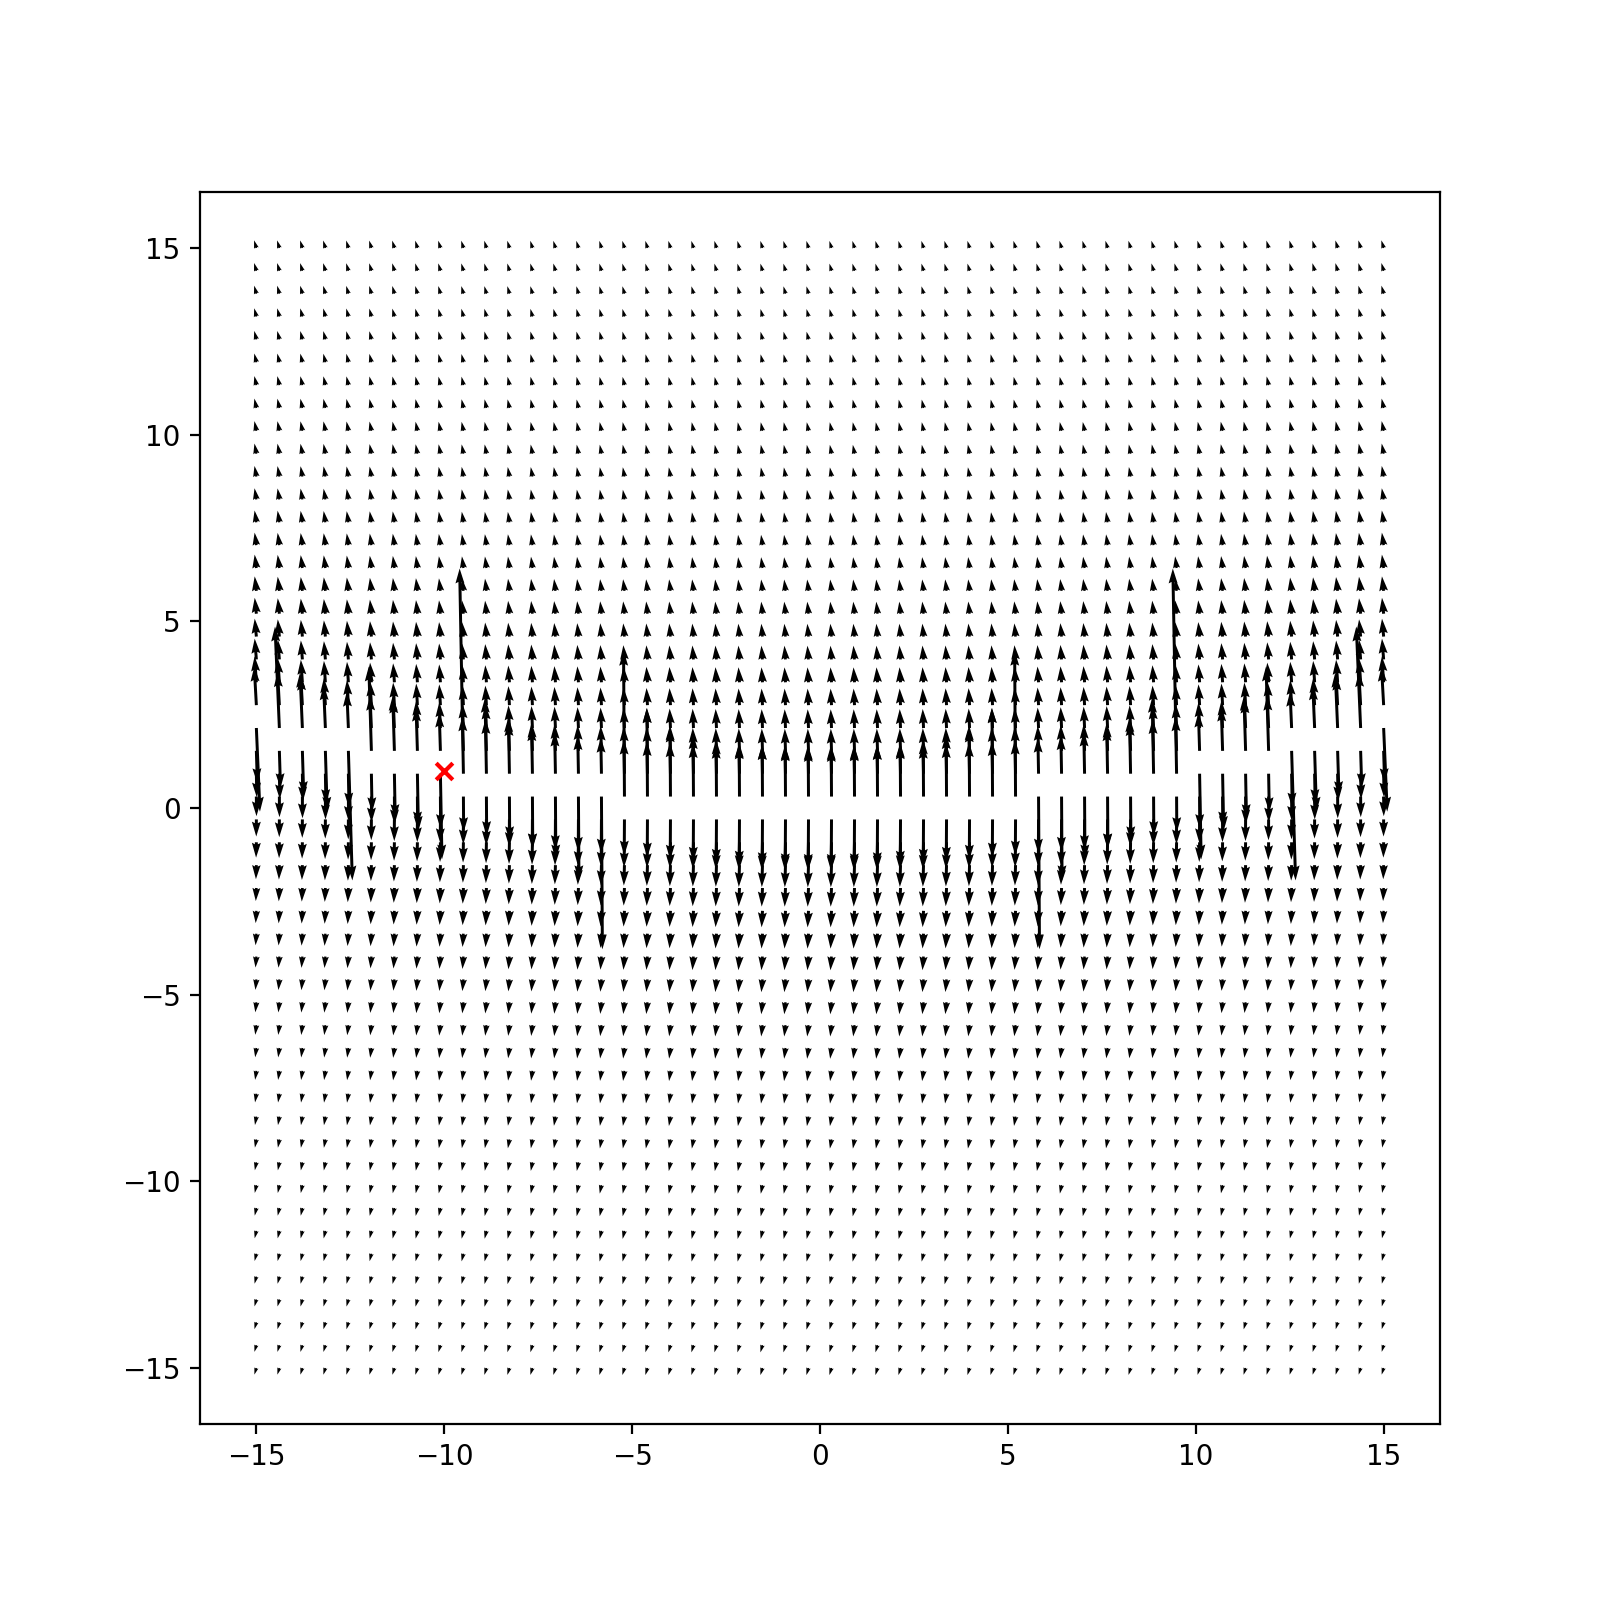

In [157]:
b.visulise_gradient(lim=15, n=50)

In [166]:
class eggholder(objective_func):
    def __init__(self):
        self.optimal = np.array([512, 404.2319])
        self.optimum = -959.6407
    def func(self, x):
        arg1 = np.sqrt(np.abs(x[1] + x[0]/2 + 47))
        arg2 = np.sqrt(np.abs(x[0] - (x[1] + 47)))
        return -(x[1] + 47) * np.sin(arg1) - x[0] * np.sin(arg2)
    def dfunc(self, x):
        arg3 = x[1] + x[0]/2 + 47
        arg4 = x[0] - (x[1] + 47)
        arg1 = np.sqrt(np.abs(arg3))
        arg2 = np.sqrt(np.abs(arg4))
        return np.array([-(x[1] + 47)*np.cos(arg1)/arg1/4*np.sign(arg3) - np.sin(arg2) - x[0]*np.cos(arg2)/arg2/2*np.sign(arg4), \
                         -np.sin(arg1) - (x[1] + 47)*np.cos(arg1)/arg1/2*np.sign(arg3) - x[1]*np.cos(arg2)/arg2/2*np.sign(arg4)])
    def get_optimal(self):
        return self.optimal
    def get_optimum(self):
        return self.optimum
e = eggholder()
e.get_optimal()
print("check func value at optimal is", e.get_optimum(), "(optimum): ", e.func(e.get_optimal()))
print("check gradient is (0,0): ", e.dfunc(e.get_optimal()))

check func value at optimal is -959.6407 (optimum):  -959.6406627106155
check gradient is (0,0):  [-3.38576455 -3.44112101]


In [205]:
e.dfunc(np.array([521.10594277, 411.962889]))

array([0.47542989, 0.79393636])

In [203]:
e.func([521.10594277, 411.962889  ])

-976.5335253916506

In [196]:
e.get_optimum()

-959.6407

In [184]:
e.dfunc(e.get_optimal())

array([-3.38576455, -3.44112101])

In [202]:
line_search_interactive(np.array((512, 404.2319)), 1, 1, e)

out of limit


array([521.10594277, 411.962889  ])

In [192]:
def line_search_interactive(x0, alpha, beta, objetive):
    '''
    @param x0: initial point position
    @param alpha: initial step size
    @param beta: control the armijo condition
    @return x: point position after moving to local minimum
    '''
    x = x0.copy()
    beta = 0.1
    tao = 0.5
    k_max = 100000
    f = objetive.func
    deri_f = objetive.dfunc
    p = - deri_f(x)
    for k in range(k_max):
        while f(x + alpha * p) > f(x) + alpha * beta * (-p @ p):
            alpha *= tao
        x += alpha * p
        p = -deri_f(x)
        if np.linalg.norm(p) < 1e-2:
            print("the magnitude of derivative: ", np.linalg.norm(p))
            print("func values before and after moving point: ", f(x0), f(x))
            print("position before and after: ", x0, x)
            break
    if k >= k_max - 1:
        print("out of limit")
    return x

<IPython.core.display.Javascript object>


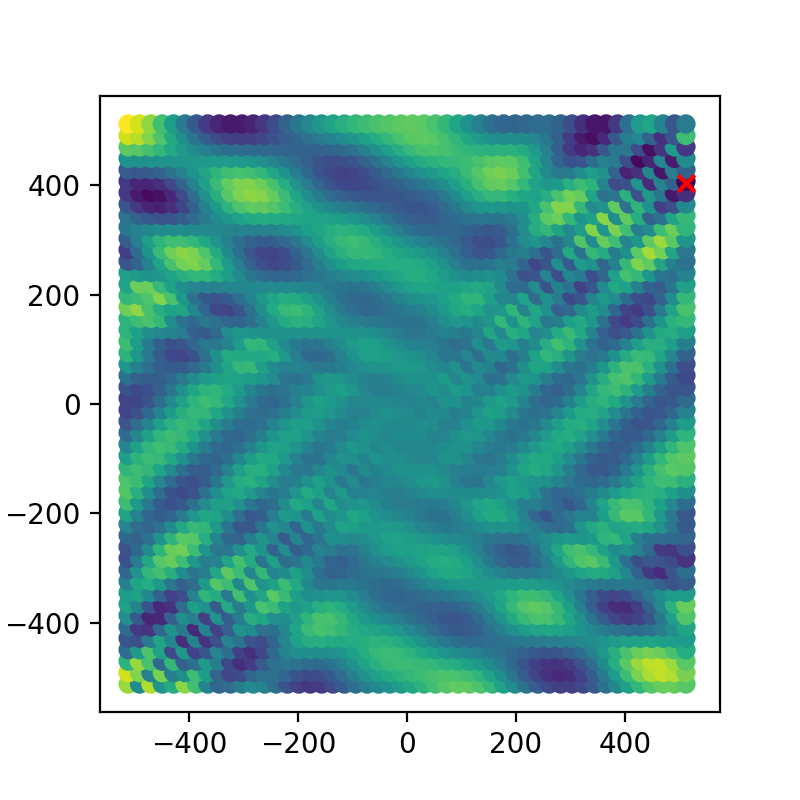

In [167]:
e.visualise2d(lim=512, n=100)

In [199]:
e.visualise3d(lim=2000, n=100)

<IPython.core.display.Javascript object>


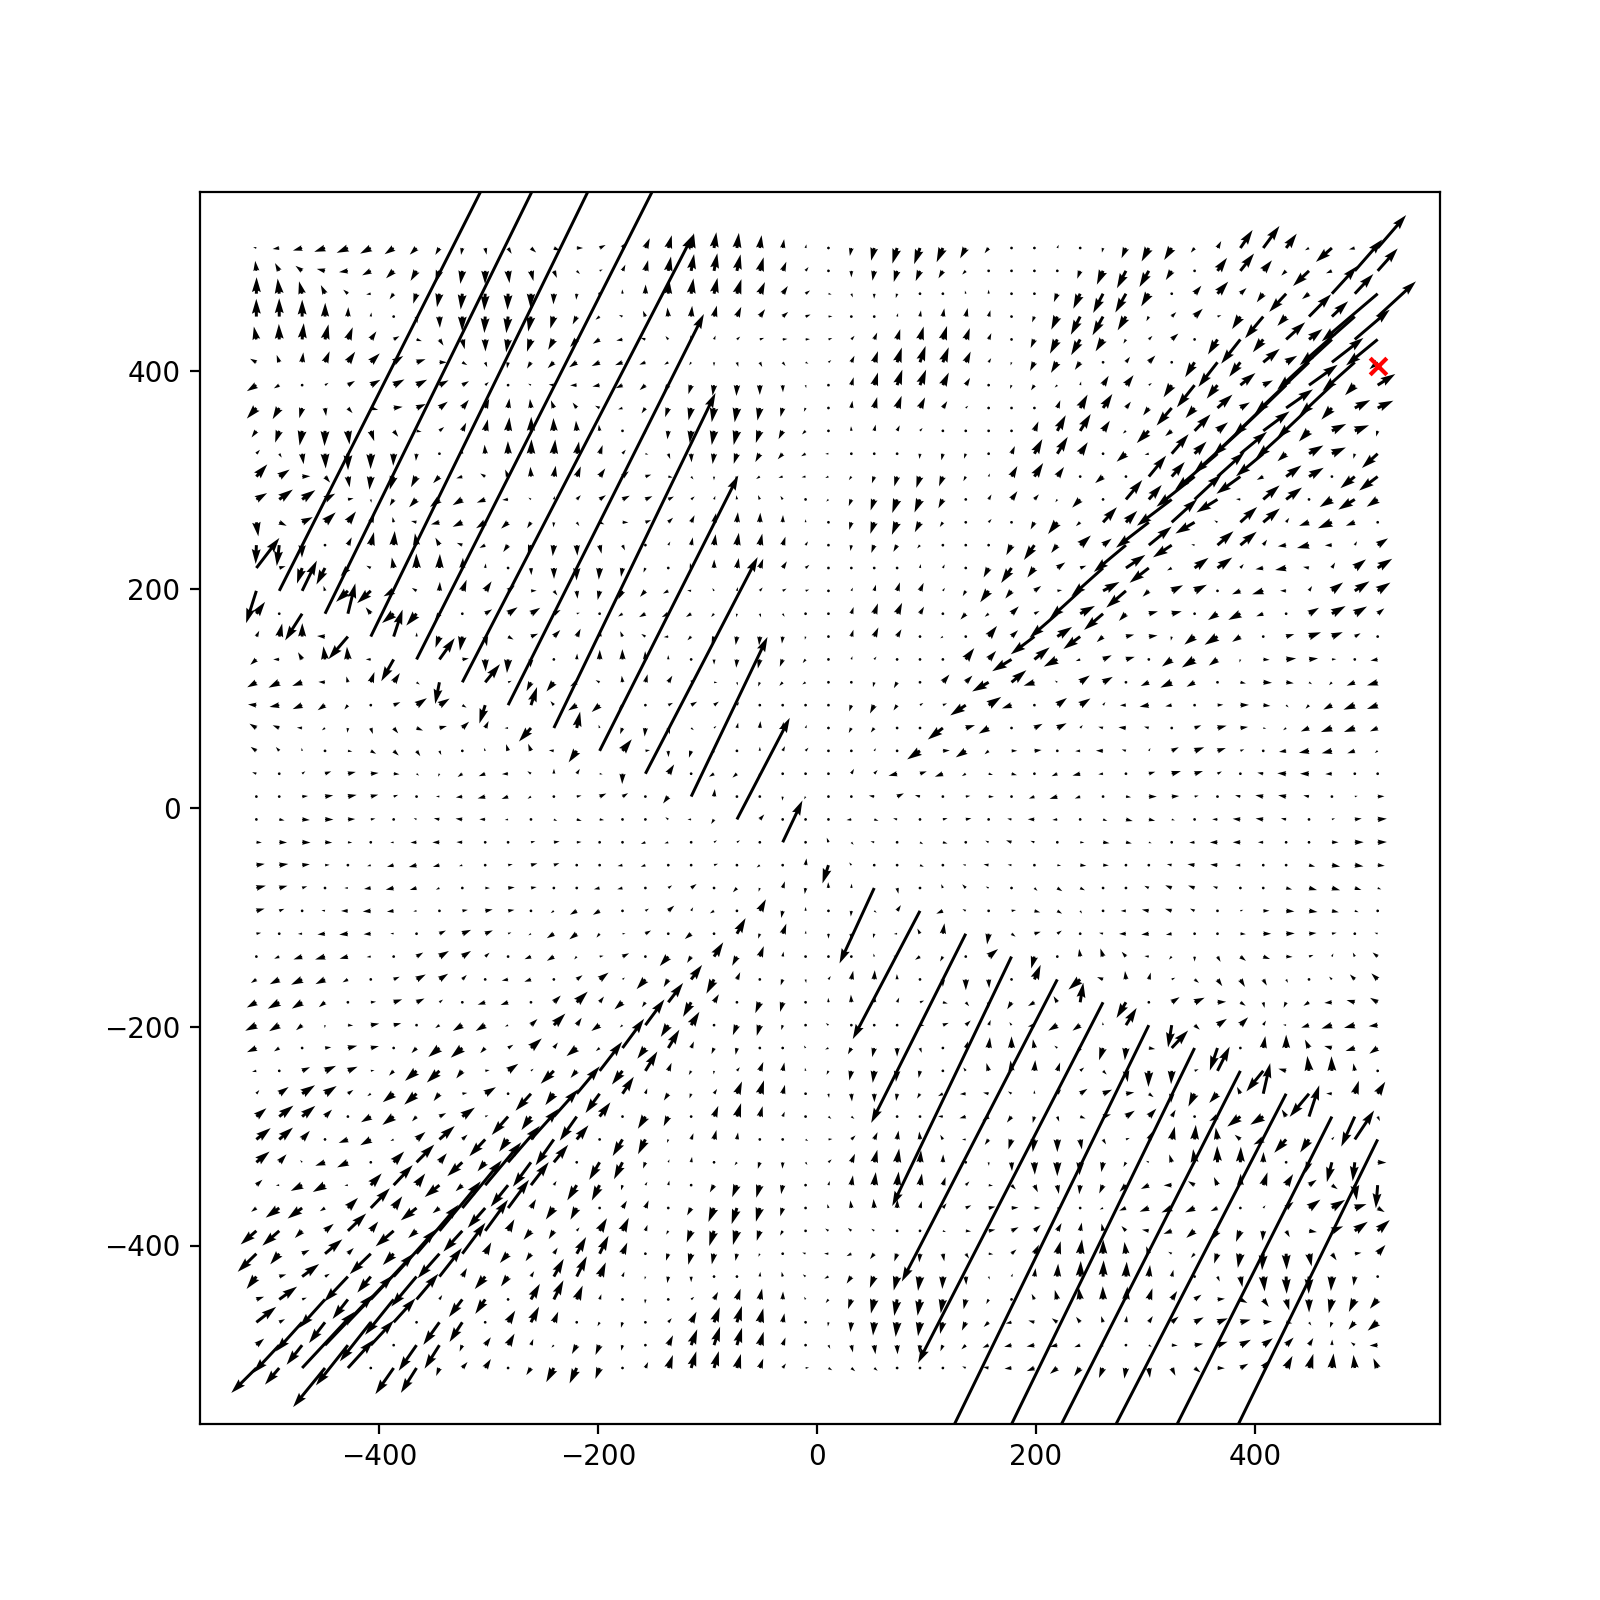

In [170]:
e.visulise_gradient(lim=512, n=50)

<IPython.core.display.Javascript object>


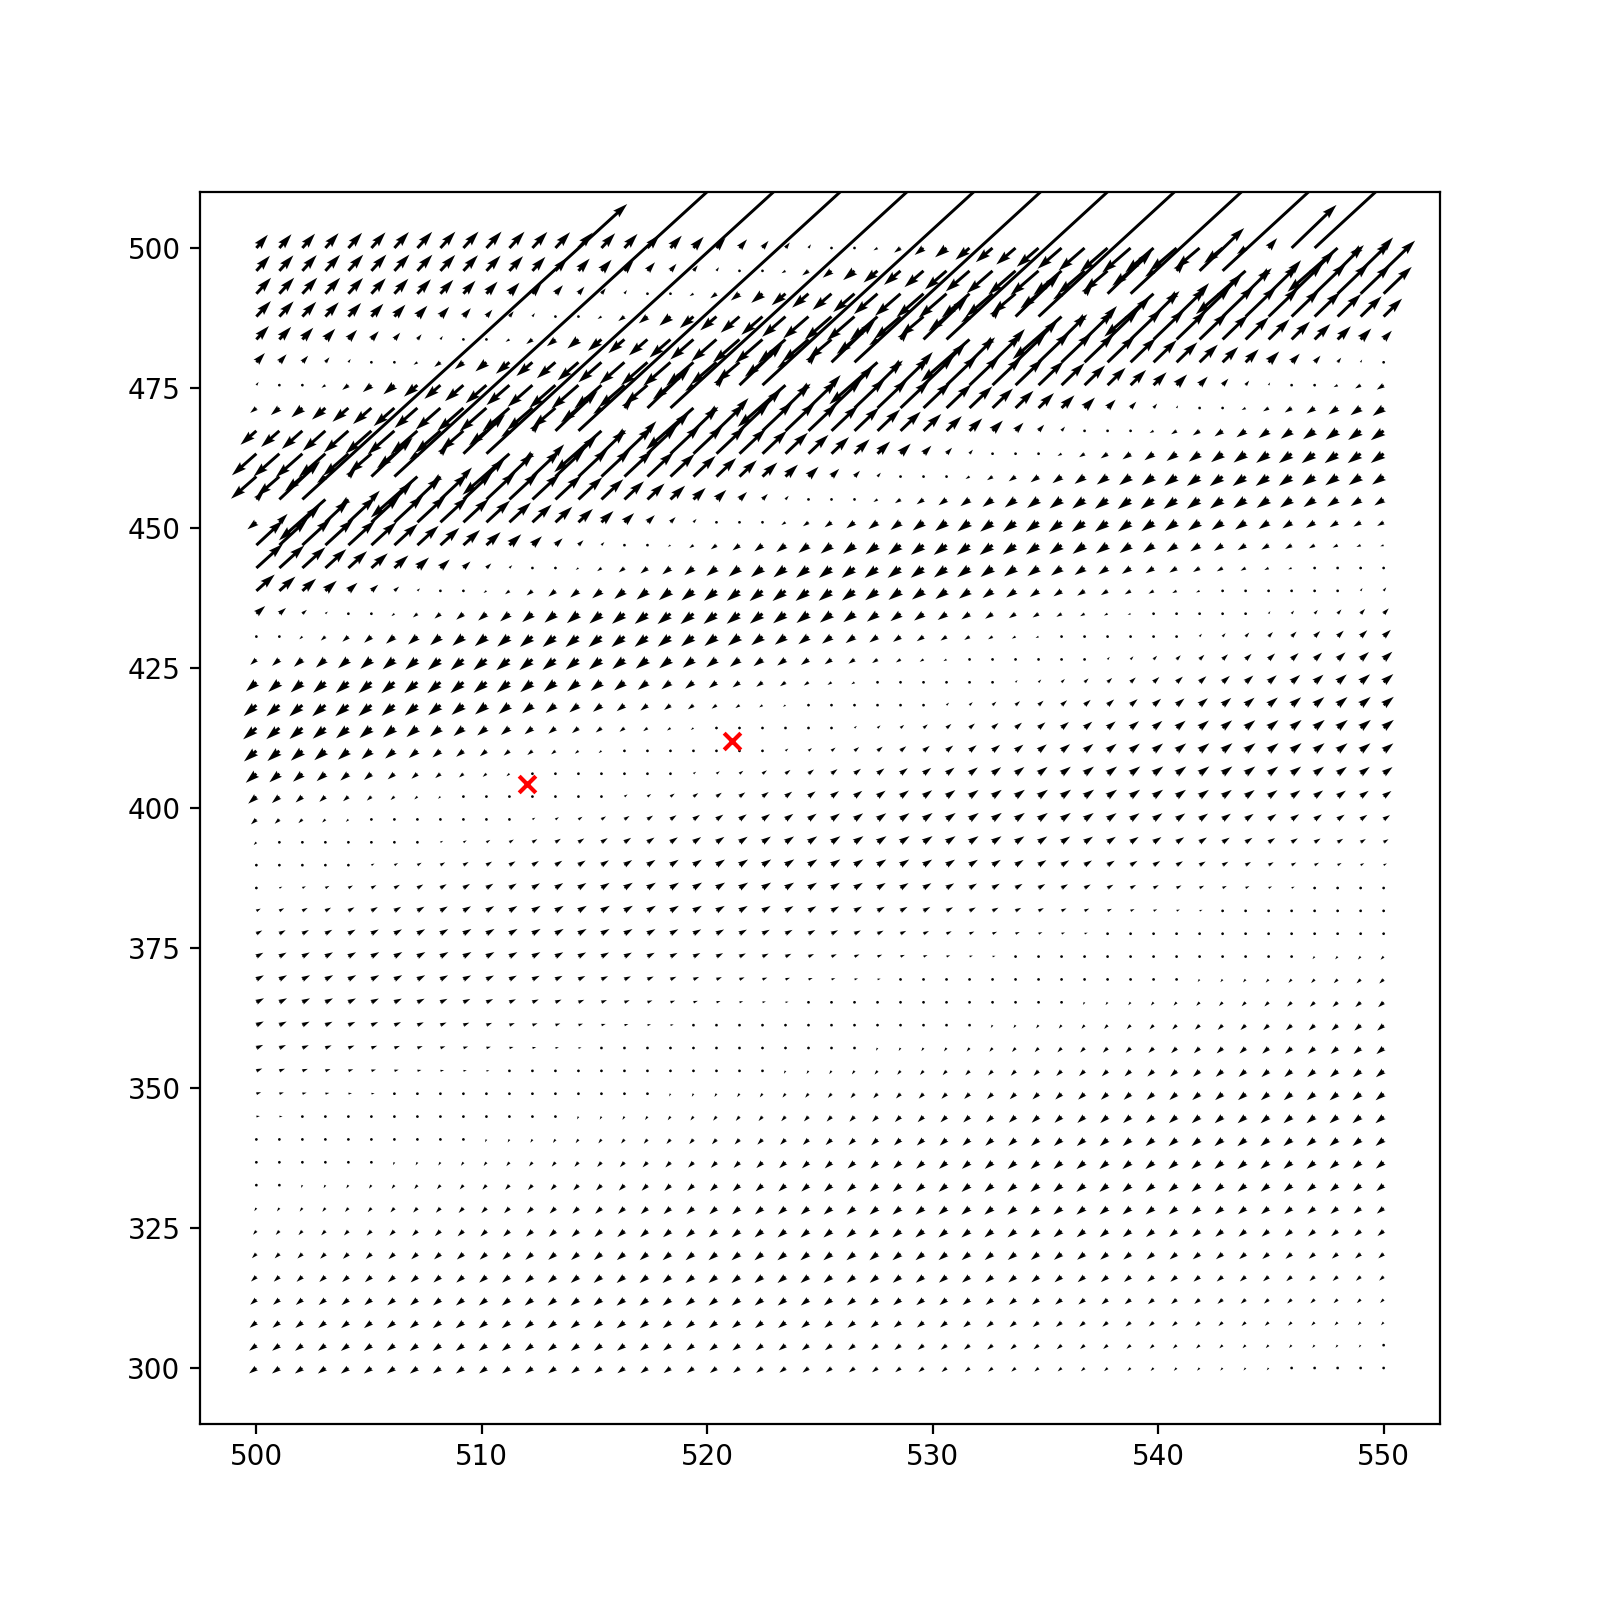

In [173]:
lim = 550
N = 50
x, y = np.linspace(500, lim, N), np.linspace(300, 500, N)
xx, yy = np.meshgrid(x, y)
zz = np.zeros((N, N, 2))
for j in range(len(y)):
    for i in range(len(x)):
        zz[j, i, :] = e.dfunc([x[i], y[j]])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.quiver(xx,yy,zz[:,:,0],zz[:,:,1])
ax.scatter(x=[e.get_optimal()[0]], y=[e.get_optimal()[1]], c='red', marker='x')
fig.show()

In [204]:
ax.scatter(x=[521.10594277], y=[411.962889], c='red', marker='x')